# Monte Carlo method on orthogonal group

In [1]:
import numpy as np
from scipy.linalg import expm
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
# number of off-diagonal coefficients in the Lie group of orthogonal matrices
n = 3
# so the matrix size m is such that n = m(m-1)/2

In [3]:
def generate_skew_sym(x: np.ndarray):
    """
    Build a skew-symmetric matrix from off diagonal coefficients
    """
    N = len(x)
    n = (1.0 + np.sqrt(8 * N + 1)) / 2.0
    # assert N = n(n-1) / 2
    assert np.round(n, decimals=0) == n
    n = int(n)
    A = np.zeros((n, n))
    A[np.triu_indices(n, 1)] = x[:]
    A[np.tril_indices(n, -1)] = -x[:]
    return A


x = np.array(range(1, 4))
A = generate_skew_sym(x)
expm(A)

array([[ 0.34810748, -0.93319235,  0.08929286],
       [-0.6313497 , -0.30378504, -0.71352099],
       [ 0.69297817,  0.19200697, -0.69492056]])

In [4]:
def sample_orthogonal_matrix(x: np.ndarray) -> np.ndarray:
    A = generate_skew_sym(x)
    O = expm(A)
    return O

In [6]:
# the measure is taken uniform on [0, 2*pi] in the Lie algebra as an example

Nx = np.logspace(2, 5, num=15, endpoint=True, dtype=int)
Ox = []
for N in tqdm(Nx):
    xx = np.random.uniform(0.0, 2 * np.pi, size=(N, n))
    res = []
    for i in range(N):
        A = generate_skew_sym(xx[i, :])
        O = expm(A)
        res.append(O)

    Ox.append(np.mean(res, axis=0))
Ox = np.array(Ox)

100%|██████████| 15/15 [02:47<00:00, 11.17s/it]


In [7]:
Ox = np.array(Ox)
dOx = Ox[1:] - Ox[:-1]
norms = [np.linalg.norm(dO) for dO in list(dOx)]

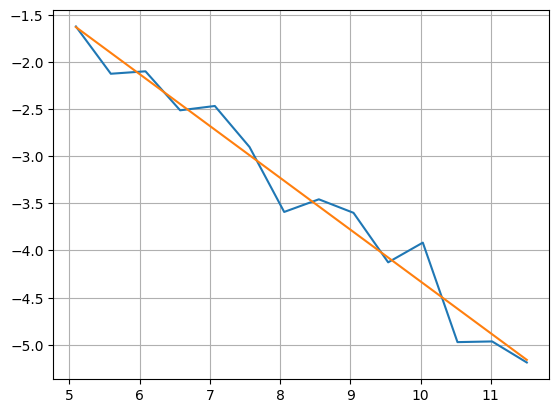

In [8]:
# compute linear regression in log space
m = len(norms)
X = np.ones((m, 2))
X[:, 1] = np.log(Nx[1:])
Y = np.array([np.log(norms)]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# plot incremental difference in log space
_, ax = plt.subplots()
ax.plot(np.log(Nx[1:]), np.log(norms))
ax.plot(np.log(Nx[1:]), [beta[0] + beta[1] * x for x in np.log(Nx[1:])])
ax.grid()

In [9]:
beta

array([[ 1.17575283],
       [-0.55048752]])

The leading coefficient is close to -.5 as expected.